In [2]:
import numpy as np
from scipy import integrate
from utils import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Homework2 PETE 4241

####   1. Estimate porosity assuming an exponential reduction in porosity as the effective stress increases (exponential compaction trend). Use the Athy’s equation where the initial porosity, $\phi_{0}$ is given as 0.386 and the coefficient of compaction is 0.0313 MPa$^{-1}$
---

In [16]:
#Unit Converter and basic paramters
ft=0.3048 #m
g_cm3=1000 #kg/m3
g=9.8 #m/s2
rho_w=1*g_cm3 #kg/m3
mega=1e6 #Mega
Pa=1 #Pa

#Load and prepare the data
data1 = np.loadtxt('BarnettShaleData.txt', skiprows=1)
DZ_Barnett,rho_Barnett=data1[:,0]*ft,data1[:,1]*g_cm3
rho_avg=1.9*g_cm3
z0=DZ_Barnett[0]

DZ_Barnett=np.insert(DZ_Barnett,0,[0,z0-1e-6])
rho_Barnett=np.insert(rho_Barnett,0,[rho_avg,rho_avg])

#GOM
data2 = np.loadtxt('GOMData.txt', skiprows=1)
DZ_GOM,rho_GOM=data2[:,0]*ft,data2[:,1]*g_cm3
rho_avg=1.75*g_cm3
zw=1000*ft
z0=DZ_GOM[0]

DZ_GOM=np.insert(DZ_GOM,0,[0,zw-1e-6,zw,z0-1e-6])
rho_GOM=np.insert(rho_GOM,0,[rho_w,rho_w,rho_avg,rho_avg])

> ##### (a) Porosity by Athy's equation  
The vertical stress can be calculated in onshore and offshore as follows:  
$${{S}_{v}}={{\bar{\rho }}_{bulk}}g{{z}_{0}}+\int\limits_{{{z}_{0}}}^{z}{{{\rho }_{bulk}}(z)gdz} 
\quad \text{Onshore} $$
$$ {{S}_{v}}={{\rho }_{w}}g{{z}_{w}}+{{\bar{\rho }}_{bulk}}g({{z}_{0}}-{{z}_{w}})+\int\limits_{{{z}_{0}}-{{z}_{w}}}^{z}{{{\rho }_{bulk}}(z)gdz} 
\quad \text{Offshore} $$
The pore pressure can be calculated as follows:  
$${{p}_{p}}={{\bar{\rho }}_{w}}g{z} $$
The effective vertical stress $\sigma'_v$ can be calculated as follows:
$$\sigma'_v=\sigma_v - p_p $$
The porosity can be calculated as follows:
$$\phi=\phi_0 e^{-\beta \sigma'_v} $$

In [27]:
#GOM
Sv_GOM=integrate.cumtrapz(rho_GOM*g, DZ_GOM)


p_pore_Barnett=rho_w*g*DZ_Barnett
p_pore_GOM=rho_w*g*DZ_GOM



Sv_eff=Sv_GOM-p_pore_GOM[1:]
showTables(X=[DZ_GOM/1e3],Y=[Sv_eff/1e6],
           XLables=['Depth_GOM(km)'],
           YLabels=['Effective Vertical Stress (MPa)'])

phi0=0.386
beta=0.0313*(1/mega*Pa)

phi_GOM=phi0*np.exp(-beta*Sv_eff)
showTables(X=[DZ_GOM/1e3],Y=[phi],
           XLables=['Depth_GOM(km)'],
           YLabels=['Porosity'])

rho_w=1*g_cm3
rho_m=2.7*g_cm3
phi_GOM_DensityLog=(rho_m-rho_GOM)/(rho_m-rho_w)

,Depth_GOM(km),Effective Vertical Stress (MPa)
0,0.000000,0.000000
1,1.362761,9.059376
2,1.655369,12.416045
3,1.947977,15.797511
4,2.240585,19.210016
5,2.533193,22.859070
6,2.825801,26.487320
7,3.118409,30.305806
8,3.411017,34.177761
9,3.703625,38.194008


,Depth_GOM(km),Porosity
0,0.000000,0.386000
1,1.362761,0.290696
2,1.655369,0.261704
3,1.947977,0.235421
4,2.240585,0.211572
5,2.533193,0.188736
6,2.825801,0.168474
7,3.118409,0.149495
8,3.411017,0.132433
9,3.703625,0.116789


> ##### (b) Plot this theoretical compaction trend on the same plot as the porosity computed in Problem 2 (iv) of homework 1.

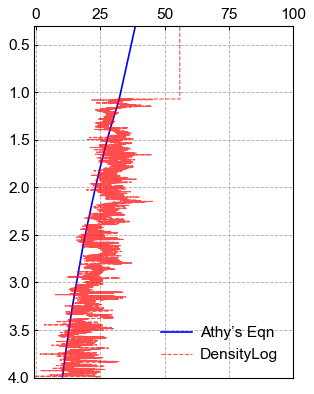

In [39]:
plotTables(Y=[DZ_GOM[1:]/1e3,DZ_GOM/1e3],X=[phi_GOM*100,phi_GOM_DensityLog*100],
        Xlim=[-1,100],Ylim=[0.3,4.0],Alpha=[1,0.7],LineWidth=[1.5,1.0],Colors=['b','r'],
        DataNames=['Athy’s Eqn','DensityLog'],InvertY=True,img_fname='img.png')

####   2. Calculate pore pressure using the porosity calculated from the density log in Problem 2(iv) of homework 1.
---

> ##### (a) Pore pressure by Athy's equation in MPa  
The Pore pressure by Athy's can be calculated as follows:  
$$ p_p = \sigma_v +\frac{1}{\beta}\ln{\frac{\phi}{\phi_0}} $$

In [43]:
rho_w=1*g_cm3
rho_m=2.7*g_cm3
phi_GOM=(rho_m-rho_GOM)/(rho_m-rho_w)


p_pore_GOM=Sv_GOM+1/beta*np.log(phi_GOM[1:]/phi0)


showTables(X=[DZ_GOM/1e3,DZ_GOM/1e3],Y=[phi_GOM,p_pore_GOM/1e6],
           XLables=['Depth_GOM(km)','Depth_GOM(km)'],
           YLabels=['Porosity_GOM(-)','Pore Pressure'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


,Depth_GOM(km),Porosity_GOM(-)
0,0.000000,1.000000
1,1.362761,0.260000
2,1.655369,0.291765
3,1.947977,0.316471
4,2.240585,0.276471
5,2.533193,0.302353
6,2.825801,0.210588
7,3.118409,0.158235
8,3.411017,0.154118
9,3.703625,0.224118


> ##### (b) Plot this calculated pore pressure together with the hydrostatic pressure and total vertical stress (versus depth).

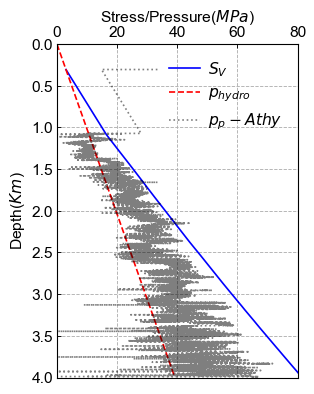

In [55]:
plotTables(Y=[DZ_GOM[1:]/1e3,DZ_GOM/1e3,DZ_GOM[1:]/1e3],X=[Sv_GOM/1e6,rho_w*g*DZ_GOM/1e6,p_pore_GOM/1e6],
           XLable='Stress/Pressure($MPa$)',YLabel='Depth($Km$)',
           DataNames=['$S_V$','$p_{hydro}$','$p_p-Athy$'],
           Ylim=[0,4],Xlim=[0,80],Alpha=[1,1.0,0.5],
           InvertY=True,img_fname='img.png')

> ##### (c) Use the plot from iii above to estimate the magnitude of the overpressure (in MPa) at 10,000 ft (3048 m) in the GOM data set

In [61]:
Magn=np.interp(1000*ft,DZ_GOM[1:],p_pore_GOM/1e6)-rho_w*g*1000*ft/1e6 #MPa
Magn

11.820970101680915